# Cardiovascular Disease Detection

Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.


In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv('cardio_train.csv', sep=';')
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [3]:
df.shape

(69301, 13)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,69301.0,50471.480397,28563.100347,988.0,25745.0,50494.0,75150.0,99999.0
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0


Observations:
1. there is no missing values
2. Age is in days 
3. for height feature, the std dev is 8.2 - while the difference between 75th percentile and max is also quite large
4. also, for height feature, the min is 55 cm which could be an outlier - but we might need to further investigate
5. the weight feature is in kgs, and here again the std is quite high = 14.38, also the min weight being 10 kg seems like we might need to further preprocess that record as such low weight seems quite astonishing except for children
6. ap_hi - systolic blood pressure - we do know the normal value here is 120 - from our data as well, we find that the 25th as well as the 50th percentile is 120 - the  mean of the sample is 128 which can also be acceptable, however, the min value = -150 and max value -16020 is completly impossible to even measure - we might need to check such values
7. a similar scenario is also present for ap_lo - diastolic pressure - as we do know the normal value is 80; negetive values and extremely high values here are incorrect
8. the remaining features are categorical and binary.. so we still need to further analyse them 

In [5]:
print('max age', round(23713/365, 2))
print('min age', round(10798/365, 2))

max age 64.97
min age 29.58


In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df['cholesterol'].value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [8]:
df['gluc'].value_counts()

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

In [9]:
df['smoke'].value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

In [10]:
df['alco'].value_counts()

0    65567
1     3734
Name: alco, dtype: int64

In [11]:
df['active'].value_counts()

1    55717
0    13584
Name: active, dtype: int64

In [12]:
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

# Univariate analysis

In [13]:
# Before we proceed with the univariate analysis , let us drop the id column as it is not related to the data
df = df.drop(columns=['id'])

In [14]:
df.shape

(69301, 12)

In [15]:
# Plotting the age in a histogram
age = df['age']

(array([4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.900e+02, 2.026e+03, 9.420e+02, 7.520e+02, 2.045e+03,
        5.070e+02, 1.090e+03, 2.112e+03, 3.170e+02, 1.564e+03, 1.929e+03,
        2.580e+02, 2.016e+03, 1.783e+03, 4.790e+02, 3.684e+03, 2.425e+03,
        8.580e+02, 3.961e+03, 1.809e+03, 1.475e+03, 4.674e+03, 1.255e+03,
        2.245e+03, 4.453e+03, 7.860e+02, 2.862e+03, 3.794e+03, 5.320e+02,
        3.444e+03, 2.942e+03, 5.720e+02, 2.886e+03, 1.550e+03, 8.320e+02,
        3.088e+03, 9.600e+02]),
 array([10798. , 11056.3, 11314.6, 11572.9, 11831.2, 12089.5, 12347.8,
        12606.1, 12864.4, 13122.7, 13381. , 13639.3, 13897.6, 14155.9,
        14414.2, 14672.5, 14930.8, 15189.1, 15447.4, 15705.7, 15964. ,
        16222.3, 16480.6, 16738.9, 16997.2, 17255.5, 17513.8, 17772.1,
        18030.4, 18288.7, 18547. , 18805.3, 19063.6, 19321.9, 19580.2,
        19838.5, 2009

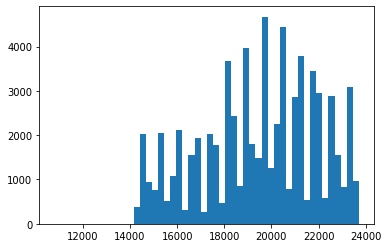

In [16]:
plt.hist(age, bins = 50)

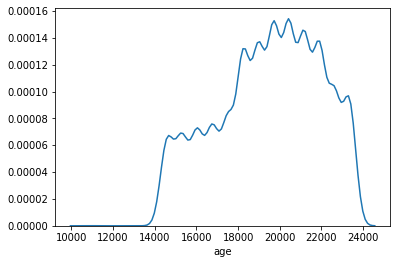

In [17]:
sns.distplot(age, hist=False)

Since our human brain cannot comprehend age in days easily, let us conert age in days to years... 

In [18]:
df['years'] = round(df['age']/365,0)

(array([4.0000e+00, 0.0000e+00, 0.0000e+00, 4.0600e+02, 3.4320e+03,
        3.2890e+03, 6.4760e+03, 3.9050e+03, 6.2590e+03, 7.9780e+03,
        7.4140e+03, 7.4160e+03, 1.2389e+04, 5.1000e+03, 5.2330e+03]),
 array([30.        , 32.33333333, 34.66666667, 37.        , 39.33333333,
        41.66666667, 44.        , 46.33333333, 48.66666667, 51.        ,
        53.33333333, 55.66666667, 58.        , 60.33333333, 62.66666667,
        65.        ]),
 <a list of 15 Patch objects>)

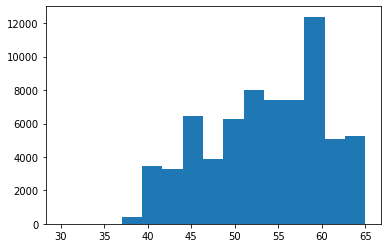

In [19]:
plt.hist(df['years'], bins = 15)

from here, it is clear that majority population in the sample is above 50 yrs

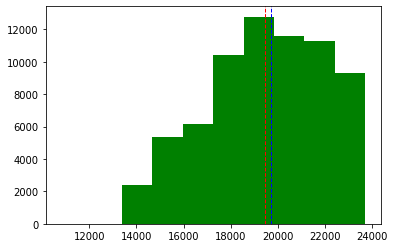

In [20]:
plt.hist(age, bins=10, color='g')
plt.axvline(age.mean(), color='r',linestyle='dashed', linewidth=1)
plt.axvline(age.median(), color='b', linestyle='dashed', linewidth=1)
plt.show()

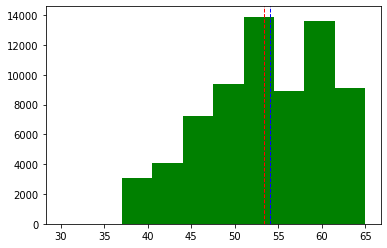

In [21]:
# plotting a similar chart for years
yrs = df['years']
plt.hist(yrs, bins=10, color='g')
plt.axvline(yrs.mean(), color='r',linestyle='dashed', linewidth=1)
plt.axvline(yrs.median(), color='b', linestyle='dashed', linewidth=1)
plt.show()

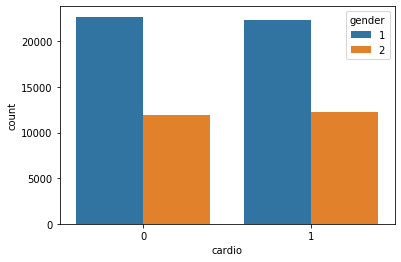

In [22]:
# Let us also look at our target variable - to understand whether the dataset is balanced or not 
sns.countplot(df['cardio'], hue = df['gender'])

As observed, the dataset is a balanced dataset... with almost equal distribution in both the target classes 

(array([1.9000e+01, 5.0000e+00, 2.4000e+01, 5.9000e+01, 4.2060e+03,
        5.3082e+04, 1.1853e+04, 5.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([ 55. ,  74.5,  94. , 113.5, 133. , 152.5, 172. , 191.5, 211. ,
        230.5, 250. ]),
 <a list of 10 Patch objects>)

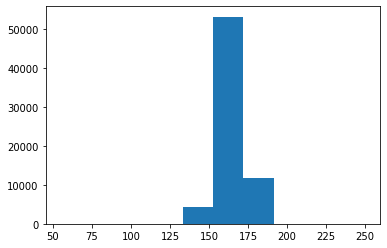

In [23]:
plt.hist(df['height'], bins = 10)

(array([2.0000e+00, 3.0000e+00, 9.0000e+00, 8.0000e+01, 5.3200e+02,
        3.4160e+03, 1.1129e+04, 1.7127e+04, 1.4276e+04, 9.8140e+03,
        6.3650e+03, 3.4970e+03, 1.4520e+03, 8.5600e+02, 3.4000e+02,
        2.1700e+02, 7.3000e+01, 3.7000e+01, 2.5000e+01, 1.5000e+01,
        1.9000e+01, 7.0000e+00, 9.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 10. ,  17.6,  25.2,  32.8,  40.4,  48. ,  55.6,  63.2,  70.8,
         78.4,  86. ,  93.6, 101.2, 108.8, 116.4, 124. , 131.6, 139.2,
        146.8, 154.4, 162. , 169.6, 177.2, 184.8, 192.4, 200. ]),
 <a list of 25 Patch objects>)

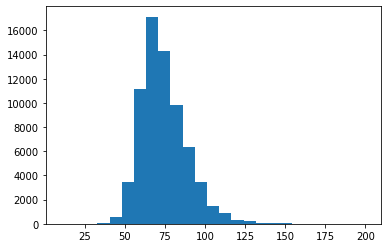

In [24]:
plt.hist(df['weight'], bins = 25)

In [25]:
df[df['weight']< 30]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
26107,23284,1,157,23.0,110,80,1,1,0,0,1,0,64.0
28789,20408,2,177,22.0,120,80,1,1,1,1,1,0,56.0
33118,21582,2,178,11.0,130,90,1,1,0,0,1,1,59.0
33577,14664,2,128,28.0,120,80,1,1,0,0,1,0,40.0
57159,18804,2,165,10.0,180,1100,2,2,0,0,1,1,52.0
59489,21855,1,162,21.0,120,80,2,1,0,0,1,1,60.0
60000,18875,1,171,29.0,110,70,2,1,0,0,1,1,52.0


In [26]:
df[df['ap_lo']< 0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
59407,22571,1,167,74.0,15,-70,1,1,0,0,1,1,62.0


In [27]:
df[df['ap_lo'] > 300]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
20,23407,2,170,74.0,140,1000,1,1,0,0,1,1,64.0
182,17405,2,170,84.0,150,1100,1,1,1,0,0,1,48.0
301,21043,2,168,82.0,160,1000,2,1,0,0,0,1,58.0
334,15906,1,167,71.0,150,1001,2,1,0,0,1,1,44.0
375,21107,2,169,76.0,140,1000,3,3,1,0,1,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69072,23330,1,167,81.0,160,1000,1,1,0,0,1,1,64.0
69173,21808,1,152,56.0,160,1000,1,1,0,0,1,1,60.0
69179,21239,2,168,95.0,160,1000,1,1,0,0,1,1,58.0
69186,22417,2,166,78.0,170,1000,1,1,0,0,0,0,61.0


as medically a person cannot have ap_lo less than 0, and there is just one such record we can drop this record from our dataset

In [28]:
df[df['ap_hi']>300]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
1177,15116,1,160,60.0,902,60,1,1,0,0,1,0,41.0
1315,22712,2,167,59.0,906,0,1,1,0,0,1,0,62.0
4118,14425,1,168,63.0,909,60,2,1,0,0,1,0,40.0
7064,21032,1,175,80.0,11500,90,1,1,0,0,1,1,58.0
8216,18870,1,164,75.0,1420,80,2,1,0,0,1,1,52.0
8858,22659,1,155,87.0,701,110,1,1,0,0,1,1,62.0
13196,15996,1,168,72.0,1500,80,1,1,0,0,1,1,44.0
17014,22398,2,163,50.0,907,70,3,3,0,0,1,1,61.0
23168,16131,1,161,92.0,906,0,2,1,0,0,1,1,44.0
24765,15835,2,169,75.0,14020,80,2,1,0,0,1,1,43.0


Since medically ap_hi cannot be higher than 300, and on observing, it might be due to error while notig dow information, we can just keep the right 3 digits max if the value is greater than 3 digits else 2 digits if value is 3 digit numeric

Questions:
1. how to handle when ap_lo < 80, ap_hi > 120
2. weight < 20 

In [29]:
import copy
df_a = copy.deepcopy(df)

In [30]:
# Identify duplicate records in the data 
dupes = df_a.duplicated()
sum(dupes)

24

In [31]:
# To remove the duplicates
df1 = df_a.drop_duplicates()

In [32]:
sum(df1.duplicated())

0

In [33]:
# Checking if any missing data is present
df1.isnull().values.any()

False

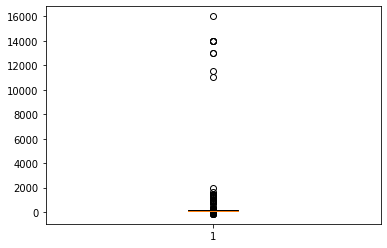

In [34]:
plt.boxplot(df1['ap_hi'])
plt.show()

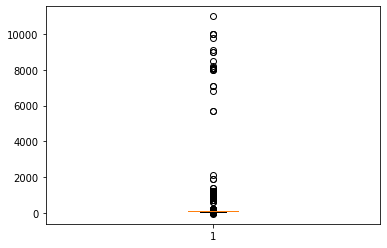

In [35]:
plt.boxplot(df1['ap_lo'])
plt.show()

Based on the above boxplots, we see that there are too many outliers - it would be ideal to discard these rows as systolica and diastolic pressure can only be in the range 0-300 
So let us drop these records

In [36]:
# Removing the outliers for df['ap_hi'] and df['ap_lo'] columns
df1 = df1.drop(df1[(df1['ap_hi'] < 0 ) | (df1['ap_lo'] < 0 ) | (df1['ap_hi'] > 300 ) | (df1['ap_lo'] > 300 )].index)

In [37]:
df1.shape

(68286, 13)

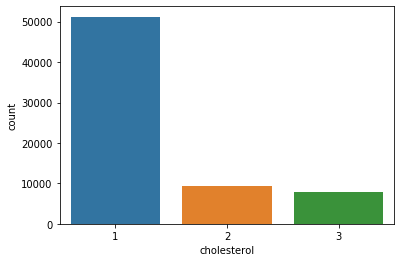

In [38]:
sns.countplot(df1['cholesterol'])

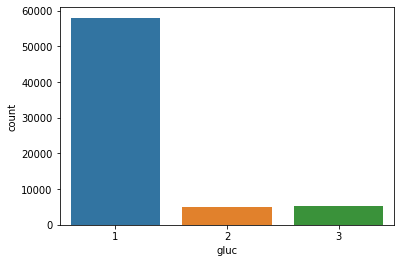

In [39]:
sns.countplot(df1['gluc'])

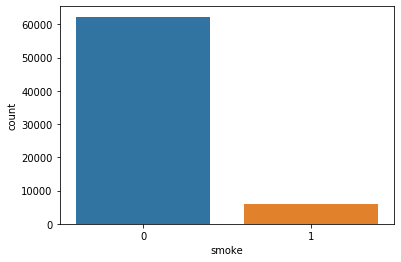

In [40]:
sns.countplot(df1['smoke'])

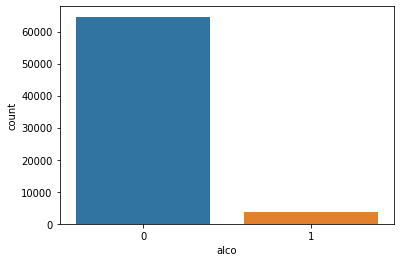

In [41]:
sns.countplot(df1['alco'])

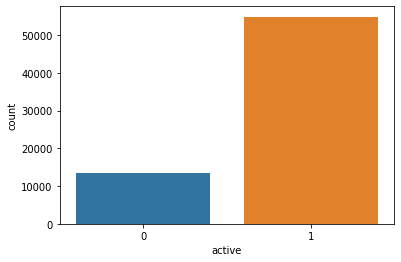

In [42]:
sns.countplot(df1['active'])

# Bivariate analysis

In [43]:
# Let us look at the target column which is 'cardio' to understand how the data is distributed amongst the various values
df1.groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years
cardio,,,,,,,,,,,,
0,34494,34494,34494,34494,34494,34494,34494,34494,34494,34494,34494,34494
1,33792,33792,33792,33792,33792,33792,33792,33792,33792,33792,33792,33792


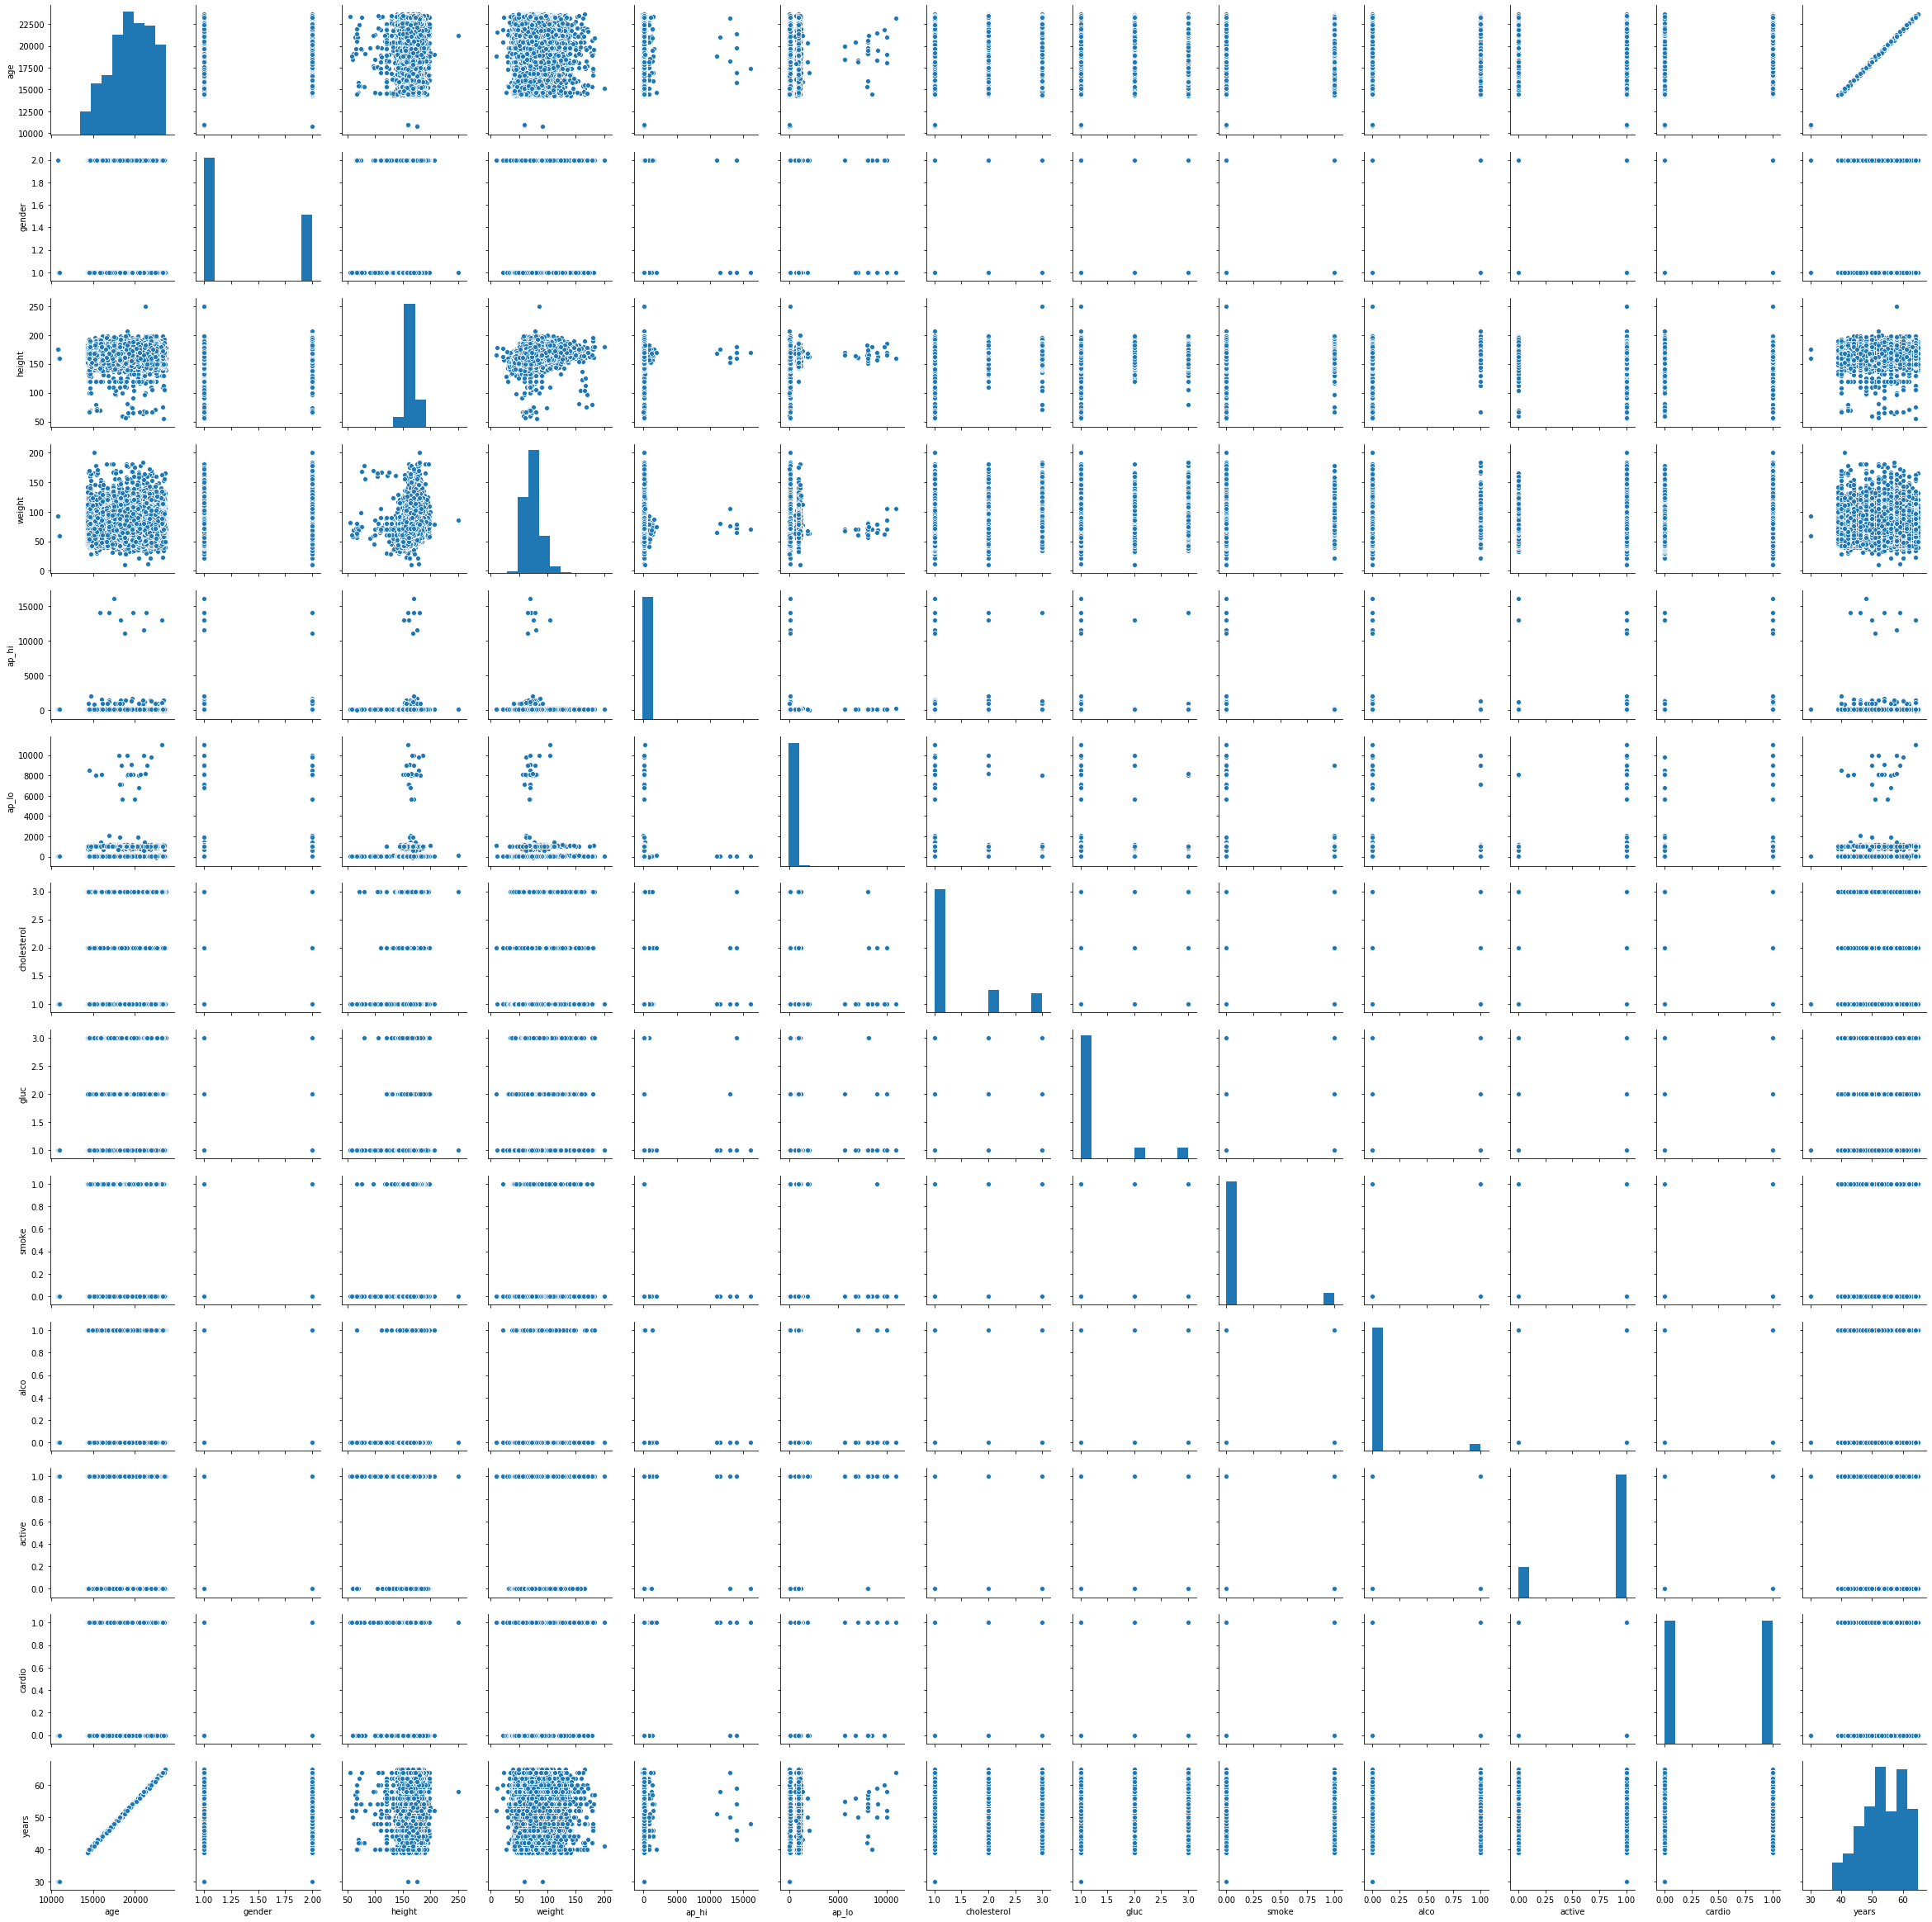

In [44]:
sns.pairplot(df)
plt.show()

In [45]:
# Displays the correlation between every possible pair of attributes as as dataframe
df1.corr() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
age,1.000000,-0.023391,-0.080468,0.055841,0.198003,0.151339,0.155411,0.099560,-0.047877,-0.028757,-0.010510,0.239681,0.999090
gender,-0.023391,1.000000,0.498386,0.156144,0.058249,0.064787,-0.037350,-0.021697,0.338095,0.171036,0.005942,0.007922,-0.023563
height,-0.080468,0.498386,1.000000,0.290857,0.017672,0.035761,-0.050912,-0.018751,0.187956,0.094208,-0.006692,-0.010659,-0.080393
weight,0.055841,0.156144,0.290857,1.000000,0.255955,0.245822,0.140628,0.107229,0.067360,0.068029,-0.017521,0.180375,0.055757
ap_hi,0.198003,0.058249,0.017672,0.255955,1.000000,0.646871,0.185194,0.088067,0.028286,0.031541,0.001260,0.400801,0.198116
ap_lo,0.151339,0.064787,0.035761,0.245822,0.646871,1.000000,0.154435,0.076717,0.024934,0.042812,-0.000598,0.328653,0.151275
cholesterol,0.155411,-0.037350,-0.050912,0.140628,0.185194,0.154435,1.000000,0.450940,0.009618,0.035819,0.008659,0.220958,0.155359
gluc,0.099560,-0.021697,-0.018751,0.107229,0.088067,0.076717,0.450940,1.000000,-0.005524,0.011397,-0.008306,0.089472,0.099454
smoke,-0.047877,0.338095,0.187956,0.067360,0.028286,0.024934,0.009618,-0.005524,1.000000,0.339810,0.025716,-0.016057,-0.048068
alco,-0.028757,0.171036,0.094208,0.068029,0.031541,0.042812,0.035819,0.011397,0.339810,1.000000,0.025616,-0.008074,-0.028947


the above information can also be seen graohically as follows:

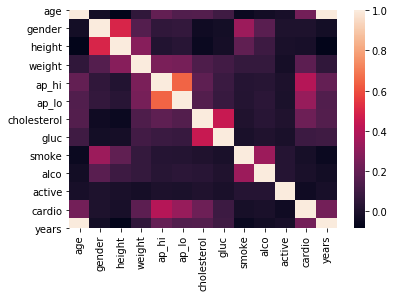

In [46]:
sns.heatmap(df1.corr())

In [47]:
# Creating the dependent and independent sets - also removing the years column which was xreated by us
X= df1.drop(columns=['cardio', 'years']) 

In [48]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
3,14549,2,165,85.0,120,80,1,1,1,1,1
4,23393,1,155,62.0,120,80,1,1,0,0,1


In [49]:
t = X.columns

In [50]:
y = df1['cardio']

In [51]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=52)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_unscaled = LogisticRegression()
lr_unscaled.fit(X_train, y_train)
y_predict = lr_unscaled.predict(X_test)

In [54]:
#coef_df = pd.DataFrame(lr.coef_, columns = X.columns)
#coef_df['intercept'] = lr.intercept_
#print(coef_df)

In [55]:
lr_unscaled_score = lr_unscaled.score(X_test, y_test)
print(lr_unscaled_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7145995021232977
[[5197 1659]
 [2239 4563]]


Improving the model... let us scale the dataset values and improve the model

In [56]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [57]:
# Fitting the model again 
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_predict = lr.predict(X_test_scaled)

In [58]:
lr_score = lr.score(X_test_scaled, y_test)
print(lr_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7268267681944648
[[5384 1472]
 [2259 4543]]


Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

nb_unscaled = GaussianNB()
nb_unscaled.fit(X_train, y_train)
y_predict = nb_unscaled.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      6856
           1       0.76      0.60      0.67      6802

    accuracy                           0.71     13658
   macro avg       0.72      0.71      0.70     13658
weighted avg       0.72      0.71      0.70     13658

[[5588 1268]
 [2727 4075]]


In [60]:
# from sklearn.naive_bayes import GaussianNB
# Using Scaled data

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_predict = nb.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      6856
           1       0.76      0.60      0.67      6802

    accuracy                           0.71     13658
   macro avg       0.72      0.71      0.70     13658
weighted avg       0.72      0.71      0.70     13658

[[5585 1271]
 [2714 4088]]


In [61]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      6856
           1       0.69      0.65      0.67      6802

    accuracy                           0.68     13658
   macro avg       0.68      0.68      0.68     13658
weighted avg       0.68      0.68      0.68     13658

[[4816 2040]
 [2359 4443]]


In [62]:
# Using scaled data
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_predict = knn.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      6856
           1       0.70      0.67      0.69      6802

    accuracy                           0.69     13658
   macro avg       0.69      0.69      0.69     13658
weighted avg       0.69      0.69      0.69     13658

[[4868 1988]
 [2221 4581]]


In [63]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6856
           1       0.63      0.62      0.62      6802

    accuracy                           0.63     13658
   macro avg       0.63      0.63      0.63     13658
weighted avg       0.63      0.63      0.63     13658

[[4342 2514]
 [2594 4208]]


In [64]:
# Using scaled data

dtc=DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
y_predict = dtc.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6856
           1       0.63      0.62      0.62      6802

    accuracy                           0.63     13658
   macro avg       0.63      0.63      0.63     13658
weighted avg       0.63      0.63      0.63     13658

[[4344 2512]
 [2606 4196]]


Based on the above models, we note that GaussianNB model seems to be giving a better prediction

In [65]:
# Serialization of the model
import joblib
joblib.dump(nb,'cardio.obj')

['cardio.obj']

In [66]:
model=joblib.load('cardio.obj')